In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os 
import numpy as np
print(os.getcwd())
from json import load
import pickle

/home/rdellave/Adaptive_stopping_MC_RL/adastop/example_simulatedR


In [2]:
path_res = "./mgres"
li = os.listdir(path_res)
n_iters = {}
decs = {}
for elem in li:
    elem_path = os.path.join(path_res, elem)
    with open(elem_path,"rb") as f:
        params, comp = pickle.load(f)
    dmu = params["diff_means"]

    if dmu in n_iters.keys():
        n_iters[dmu].append(comp["n_iter"] / 2)
    else:
        n_iters[dmu] = [comp["n_iter"]/2]

    if dmu in decs.keys():
        decs[dmu].append(comp["decision"])
    else:
        decs[dmu] = [comp["decision"]]


/home/rdellave/miniconda3/envs/rlberry/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/rdellave/miniconda3/envs/rlberry/lib/python3.8/site-packages/torch/utils/tensorboard/__init__.py:4: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if not hasattr(tensorboard, '__version__') or LooseVersion(tensorboard.__version__) < LooseVersion('1.15'):
/home/rdellave/miniconda3/envs/rlberry/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/home/rdellave/miniconda3/envs/rlberry/lib/python3.8/site-packages/seaborn/rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version inst

In [23]:
power = {}
power_std = {}
power_confidence_interval = {}
n_iter_avg = {}
sqrt_n = np.sqrt(len(decs[0]))
print(sqrt_n)

for dmu in decs.keys():
    p = np.array(decs[dmu]) == "reject"
    power[dmu] = np.mean(p)
    power_std[dmu] = np.std(p)
    power_confidence_interval[dmu] = np.std(p)/sqrt_n*3
for k in n_iters.keys():
    n_iter_avg[k] = np.mean(n_iters[k])

powers, power_stds, power_confidence_intervals = dict(sorted(power.items())),  dict(sorted(power_std.items())), dict(sorted(power_confidence_interval.items())) 

100.0


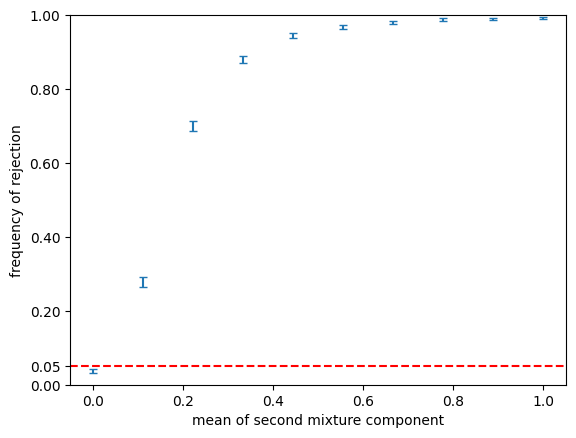

In [24]:
import sys
import os
home_folder = os.environ["HOME"]
workdir = os.path.join(home_folder,"Adaptive_stopping_MC_RL","adastop", "example_simulatedR")
sys.path.insert(0, workdir)

plt.axhline(y = 0.05, color = 'r', linestyle = '--')
# plt.axhline(y = 1, color = 'r', linestyle = '-')
# plt.axhline(y = 0., color = 'r', linestyle = '-')
plt.ylim((0,1))
plt.yticks(np.append(np.linspace(0,1,6),0.05))
# plt.errorbar(powers.keys(), powers.values(), list(power_stds.values()), linestyle='None', marker= 'o', capsize=3)
plt.errorbar(powers.keys(), powers.values(), list(power_confidence_intervals.values()), linestyle='None', fmt = "none", capsize=3)
plt.ylabel("frequency of rejection")
plt.xlabel("mean of second mixture component")

plt.savefig(os.path.join(workdir, "gaussianVSmg.png"))
plt.savefig(os.path.join(workdir, "gaussianVSmg.pdf"))


